<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Arima1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
od1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/od31.csv')
od1

,Demand
0,22.46
1,20.27
2,20.97
3,23.68
4,23.25
5,23.48
6,24.81
7,25.44
8,24.88
9,27.38


<Axes: >

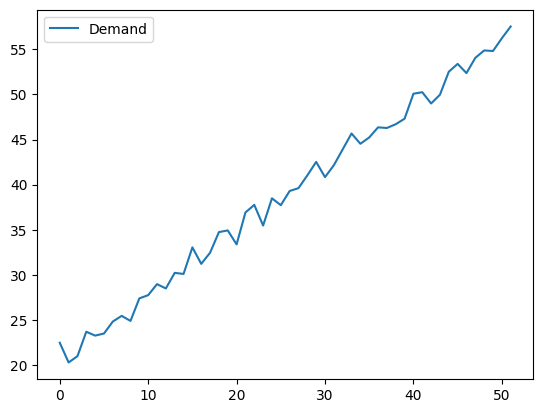

In [2]:
od1.plot()

In [3]:
#testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(od1['Demand'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.352327
p-value: 0.917759
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


<Axes: >

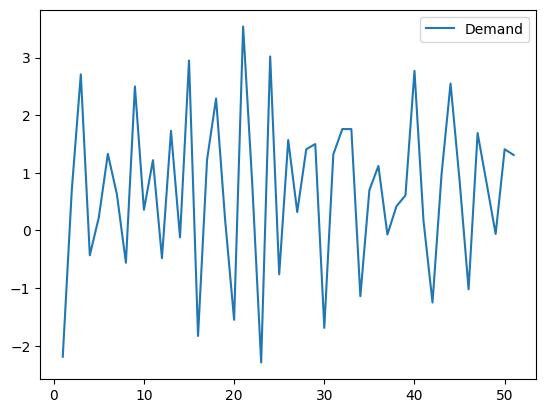

In [4]:
dod1 = od1 - od1.shift(1)
dod1.plot()

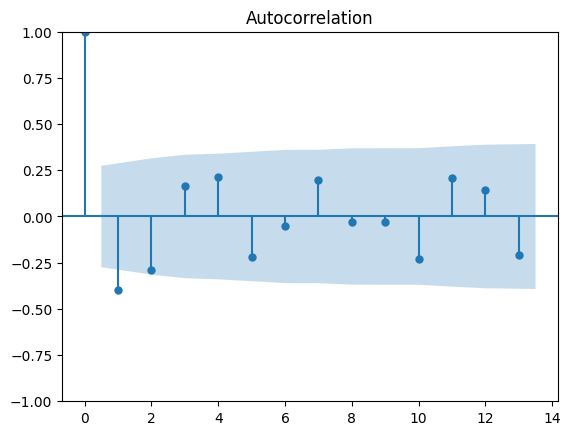

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


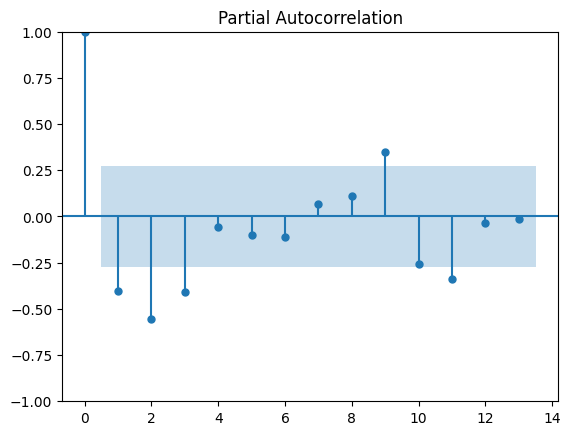

In [5]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
dod1=dod1.dropna()
fig = tsaplots.plot_acf(dod1, lags=13)
plt.show()
fig = tsaplots.plot_pacf(dod1, lags=13)
plt.show()


In [7]:

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(od1['Demand'],order=(3,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Demand   No. Observations:                   52
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -76.669
Date:                Tue, 02 May 2023   AIC                            163.338
Time:                        06:16:20   BIC                            172.997
Sample:                             0   HQIC                           167.029
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3106      0.134      2.321      0.020       0.048       0.573
ar.L2          0.0909      0.132      0.688      0.491      -0.168       0.350
ar.L3          0.5985      0.127      4.728      0.000       0.350       0.847
ma.L1         -0.9977      3.943     -0.253      0.800      -8.725       6.730
sigma2         1.0564      4.182      0.253      0.801      -7.141       9.254
===================================================================================
Ljung-Box (L1) (Q):                   2.95   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.09   Prob(JB):                         0.49
Heteroskedasticity (H):               0.68   Skew:                             0.15
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(od1['Demand'],order=(0,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Demand   No. Observations:                   52
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -94.436
Date:                Tue, 02 May 2023   AIC                            192.872
Time:                        06:16:41   BIC                            196.736
Sample:                             0   HQIC                           194.349
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1122      0.174     -0.645      0.519      -0.453       0.229
sigma2         2.3756      0.596      3.986      0.000       1.208       3.544
===================================================================================
Ljung-Box (L1) (Q):                   6.70   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.01   Prob(JB):                         0.60
Heteroskedasticity (H):               0.77   Skew:                            -0.28
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(od1['Demand'],order=(0,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Demand   No. Observations:                   52
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -94.346
Date:                Tue, 02 May 2023   AIC                            194.693
Time:                        06:17:57   BIC                            200.488
Sample:                             0   HQIC                           196.908
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1891      0.165     -1.149      0.251      -0.512       0.134
ma.L2          0.0771      0.144      0.535      0.592      -0.205       0.359
sigma2         2.3658      0.602      3.927      0.000       1.185       3.546
===================================================================================
Ljung-Box (L1) (Q):                   4.73   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.03   Prob(JB):                         0.55
Heteroskedasticity (H):               0.85   Skew:                            -0.33
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

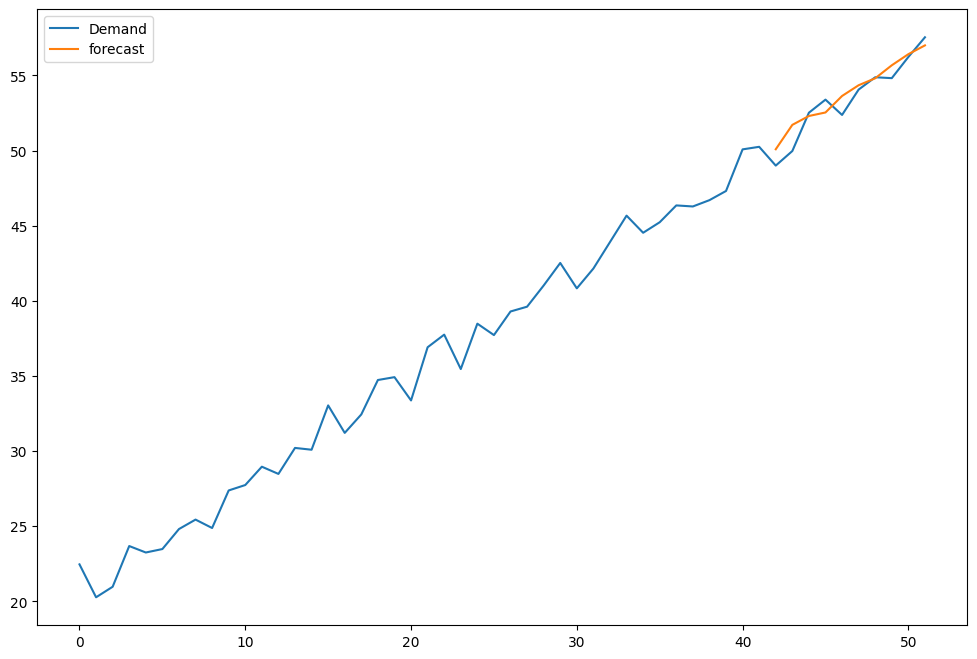

In [12]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(od1['Demand'],order=(3, 1, 1))
results=model.fit()
od1['forecast']=results.predict(start=42,end=51,dynamic=True)
od1[['Demand','forecast']].plot(figsize=(12,8))
#When you set dynamic=True, the model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, 
#it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast. This is called out-of-sample prediction.
#When you set dynamic=False, the model sequentially predicts one-step-ahead using 
#the true value from previous time step instead of using predicted value. This is called in-sample prediction.